In [49]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#sns.__version__

In [51]:
nyc = pd.read_excel("nyc_crime_data.xls", header=0)  #manually removed the first 4 rows in the excel file containing metadata

In [52]:
nyc.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [53]:
nyc['pop_sqr'] = nyc.Population**2

In [54]:
nyc['murder'] = np.where(nyc['Murder and\nnonnegligent\nmanslaughter'] > 0,1,0)
nyc['robbery_cat'] = np.where(nyc.Robbery > 0, 1, 0)

In [55]:
nyc.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,pop_sqr,murder,robbery_cat
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,3.463321e+06,0,0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,6.640929e+06,0,0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,8.099716e+06,0,0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,9.595378e+09,1,1
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,4.080654e+07,0,1


In [56]:
# Basic data cleaning 
nyc.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,pop_sqr,murder,robbery_cat
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000,3.480000e+02,351.000000,351.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658,2.035547e+11,0.139601,0.595442
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411,3.778876e+12,0.347067,0.491507
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.766760e+05,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000,9.018117e+06,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000,5.232568e+07,0.000000,1.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000,3.397536e+08,0.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000,7.049493e+13,1.000000,1.000000


In [57]:
# Deleting the rape1 column 

nyc.pop('Rape\n(revised\ndefinition)1')  #because all NaN

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
321   NaN
322   NaN
323   NaN
324   NaN
325   NaN
326   NaN
327   NaN
328   NaN
329   NaN
330   NaN
331   NaN
332   NaN
333   NaN
334   NaN
335   NaN
336   NaN
337   NaN
338   NaN
339   NaN
340   NaN
341   NaN
342   NaN
343   NaN
344   NaN
345   NaN
346   NaN
347   NaN
348   NaN
349   NaN
350   NaN
Name: Rape\n(revised\ndefinition)1, Length: 351, dtype: float64

In [58]:
nyc.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'pop_sqr',
       'murder', 'robbery_cat'],
      dtype='object')

In [59]:
nyc = nyc.rename(index=str, columns={'City': 'city', 'Population': 'population', 'Violent\ncrime': 'violent_crime',
       'Murder and\nnonnegligent\nmanslaughter' : 'murder_slaughter',
       'Rape\n(legacy\ndefinition)2': 'rape',
       'Robbery': 'robbert_default', 'Aggravated\nassault': 'aggr_assault', 
        'Property\ncrime': 'property_crime', 'Burglary':'burglary',
       'Larceny-\ntheft': 'larceny', 'Motor\nvehicle\ntheft': 'motor_theft'})

In [60]:
nyc.head()

,city,population,violent_crime,murder_slaughter,rape,robbert_default,aggr_assault,property_crime,burglary,larceny,motor_theft,Arson3,pop_sqr,murder,robbery_cat
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,3.463321e+06,0,0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,6.640929e+06,0,0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,8.099716e+06,0,0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,9.595378e+09,1,1
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,4.080654e+07,0,1


In [61]:
nyc.isnull().sum()

city                  0
population            3
violent_crime         3
murder_slaughter      3
rape                  3
robbert_default       3
aggr_assault          3
property_crime        3
burglary              3
larceny               3
motor_theft           3
Arson3              164
pop_sqr               3
murder                0
robbery_cat           0
dtype: int64

In [62]:
nyc[nyc.city.str.contains('The')]
# index 348-350 . # the last three rows

,city,population,violent_crime,murder_slaughter,rape,robbert_default,aggr_assault,property_crime,burglary,larceny,motor_theft,Arson3,pop_sqr,murder,robbery_cat
348,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
349,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
350,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [63]:
nyc = nyc[:-3]

In [73]:
print(nyc.isnull().sum())  #nyc.isna().sum()


city                  0
population            0
violent_crime         0
murder_slaughter      0
rape                  0
robbert_default       0
aggr_assault          0
property_crime        0
burglary              0
larceny               0
motor_theft           0
Arson3              161
pop_sqr               0
murder                0
robbery_cat           0
dtype: int64


(0, 500)

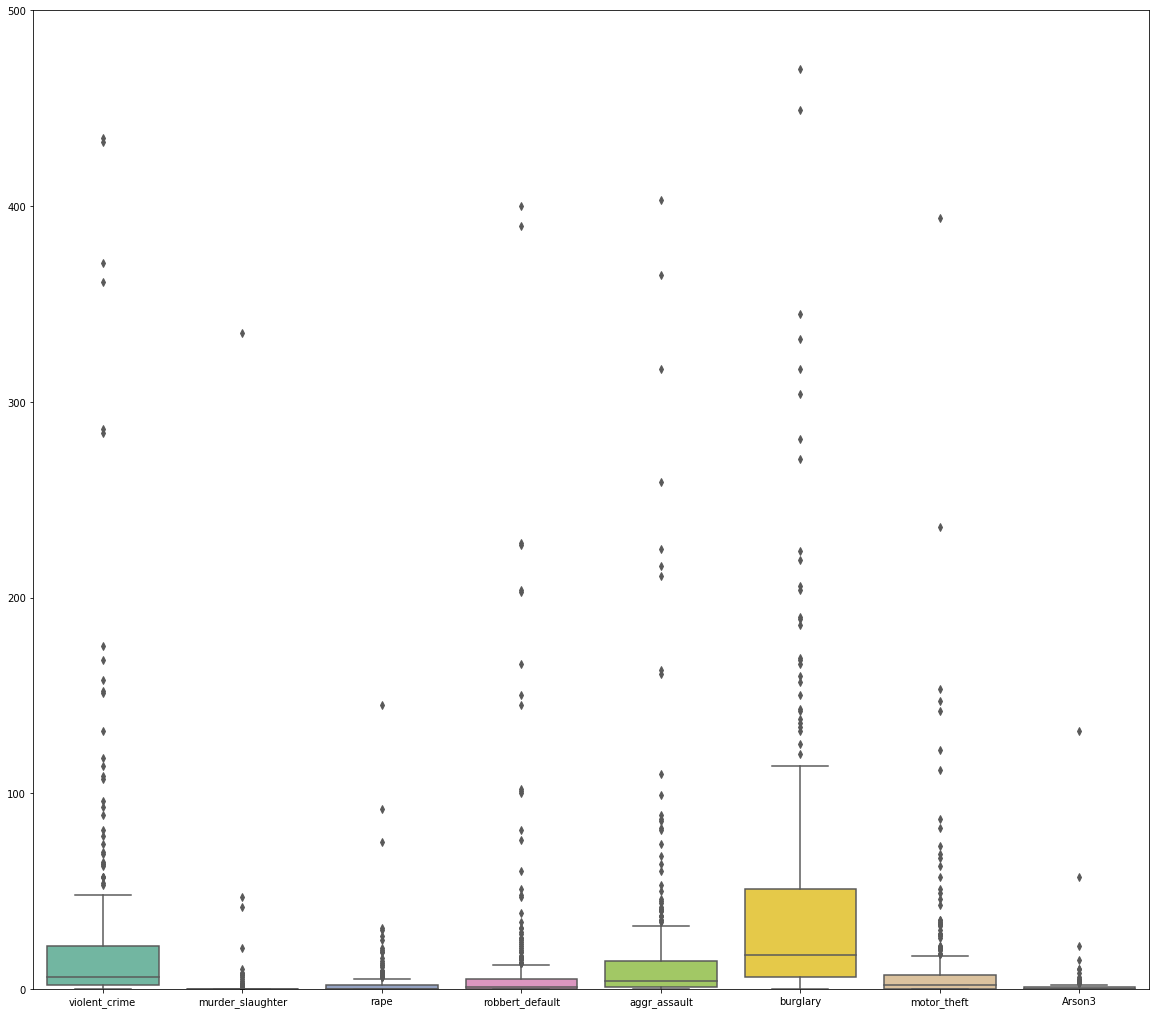

In [85]:
plt.figure(figsize=(20, 18))
sns.boxplot(data=nyc[['violent_crime', 'murder_slaughter', 'rape',
       'robbert_default', 'aggr_assault', 'burglary',
        'motor_theft', 'Arson3']], palette="Set2" )
#plt.ylim(0,5000)  #default shows few (6 in number) outliers after 5000
#plt.ylim(0,1000)  #default shows few outliers after 1000
plt.ylim(0,500)  #almost all values of these variables are concentrated under 500

# Among the variables 'burglary' is the most common 

In [93]:
# creating features - city to boroughs 

In [94]:
nyc.city.duplicated().value_counts()  # no duplicated city names


False    348
Name: city, dtype: int64

In [95]:
nyc.city

0                   Adams Village
1        Addison Town and Village
2                   Akron Village
3                          Albany
4                  Albion Village
5                  Alfred Village
6                Allegany Village
7                    Amherst Town
8              Amityville Village
9                       Amsterdam
10                 Arcade Village
11                Ardsley Village
12              Asharoken Village
13                 Attica Village
14                         Auburn
15                   Avon Village
16          Baldwinsville Village
17           Ballston Spa Village
18                        Batavia
19                   Bath Village
20                   Bedford Town
21                 Bethlehem Town
22                     Binghamton
23                    Black River
24            Blooming Grove Town
25                Bolivar Village
26                    Bolton Town
27              Boonville Village
28                     Brant Town
29            

In [75]:
nyc.iloc[np.where(nyc.pop_sqr == nyc.pop_sqr.max())]

,city,population,violent_crime,murder_slaughter,rape,robbert_default,aggr_assault,property_crime,burglary,larceny,motor_theft,Arson3,pop_sqr,murder,robbery_cat
216,New York,8396126.0,52384.0,335.0,1112.0,19170.0,31767.0,141971.0,16606.0,117931.0,7434.0,NaN,7.049493e+13,1,1


In [20]:
nyc.population.max()

8396126.0

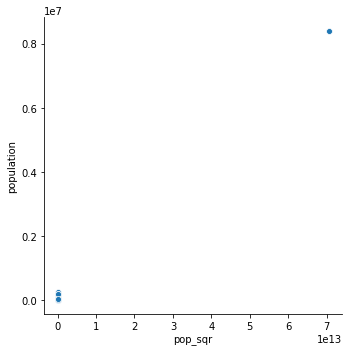

In [27]:
sns.relplot(x='pop_sqr', y='population', data=nyc, kind='scatter')

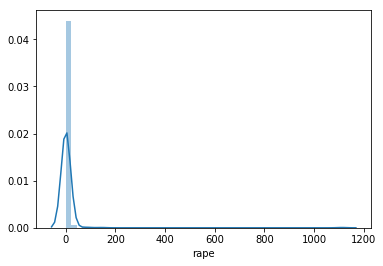

In [25]:
sns.distplot(nyc.rape)

In [22]:
nyc.head()

,city,population,violent_crime,murder_slaughter,rape,robbert_default,aggr_assault,property_crime,burglary,larceny,motor_theft,Arson3,pop_sqr,murder,robbery_cat
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,3.463321e+06,0,0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,6.640929e+06,0,0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,8.099716e+06,0,0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,9.595378e+09,1,1
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,4.080654e+07,0,1


In [57]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
#import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [67]:
nyc[['pop_sqr','murder','robbery_cat']].isnull().sum() 

AttributeError: 'DataFrame' object has no attribute 'isinf'

In [64]:
nyc.loc[np.isnan(nyc['pop_sqr']), 'pop_sqr'] = 0


In [74]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = nyc.Population
X = nyc[['robbery_cat']]
regr.fit(X, Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [72]:
Y.describe()

count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: Population, dtype: float64